In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.decomposition import PCA
import numpy as np

pd.set_option('display.max_columns', None)

%matplotlib inline


In [2]:
data_df = pd.read_csv('initial_data.csv',na_filter=False)

classes = ['scout', 'soldier', 'pyro', 'demoman','heavy', 'engineer', 'medic', 'sniper', 'spy']
item_slots = ['headgear','misc','taunt','weapon']

not_accepted_df = data_df[data_df['accepted']==0]
accepted_df = data_df[data_df['accepted']==1]

data_df.head()

,name,discussions_count,comments_count,submitter,movie_count,screenshot_count,awards_count,link_count,file_size_mb,change_notes,certified_compatible,creator_count,featured_collection_count,visitors_count,favorites_count,description,accepted,posted_time,updated_time,class_count,item_slot_count,class_scout,class_soldier,class_pyro,class_demoman,class_heavy,class_engineer,class_medic,class_sniper,class_spy,item_slot_headgear,item_slot_misc,item_slot_taunt,item_slot_weapon
0,Spooky Sleeves,0,154,GT500&gt;JZeeba ジェイシーバ,0,6,0,0,4.971,7,1,2,115,5492,428,<type good description here>Halloween 2012 Sub...,1,1.348987e+09,1.457338e+09,5,1,1,0,0,1,1,1,0,1,0,0,1,0,0
1,Spooky Shoes,0,40,GT500&gt;JZeeba ジェイシーバ,0,4,0,0,2.958,4,1,2,46,2218,173,<type good description here>Halloween 2012 Sub...,1,1.348987e+09,1.445490e+09,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,The Crossed Stitch,0,238,Sparkwire,0,2,0,0,4.277,1,0,4,100,11905,859,I have no mouth and I must scream.Thanks to Tr...,1,1.349004e+09,1.349004e+09,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,Head-Takers Hallmark,0,237,&gt;&gt;-The Heartsman--&gt;,0,8,0,0,4.567,3,0,2,91,10085,650,A skull collector. A Noggin connoisseur. Put t...,1,1.349020e+09,1.349856e+09,9,1,1,1,1,1,1,1,1,1,1,0,1,0,0
4,Engagement Ring,3,773,Ko,0,0,0,0,0.572,1,0,1,17,33200,102,An engagement ring you can use to propose to t...,1,1.328952e+09,1.328952e+09,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='class_count', ylabel='Count'>

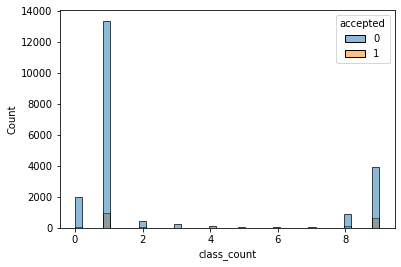

In [3]:
sns.histplot(data=data_df,x='class_count',hue='accepted')

<AxesSubplot:title={'center':'accepted'}, ylabel='class_count'>

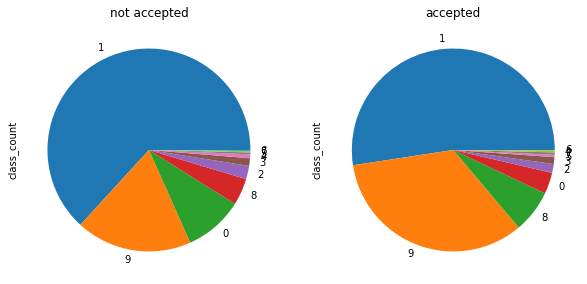

In [4]:
fig,axes = plt.subplots(1,2,facecolor='white',figsize=(10,5))

not_accepted_df['class_count'].value_counts().plot(kind='pie',ax=axes[0],title='not accepted')
accepted_df['class_count'].value_counts().plot(kind='pie',ax=axes[1],title='accepted')

<AxesSubplot:title={'center':'accepted'}, ylabel='certified_compatible'>

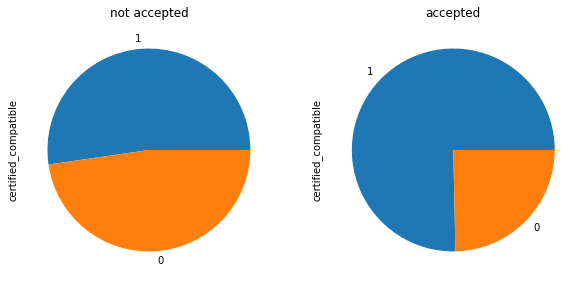

In [5]:
fig,axes = plt.subplots(1,2,facecolor='white',figsize=(10,5))

not_accepted_df['certified_compatible'].value_counts().plot(kind='pie',ax=axes[0],title='not accepted')
accepted_df['certified_compatible'].value_counts().plot(kind='pie',ax=axes[1],title='accepted')

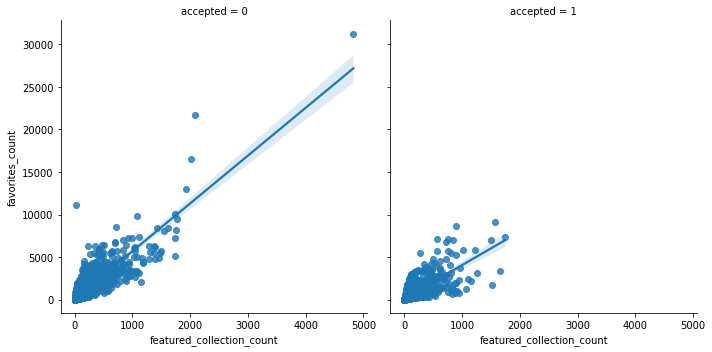

In [6]:
sns.lmplot(data=data_df,x="featured_collection_count", y="favorites_count", col="accepted")

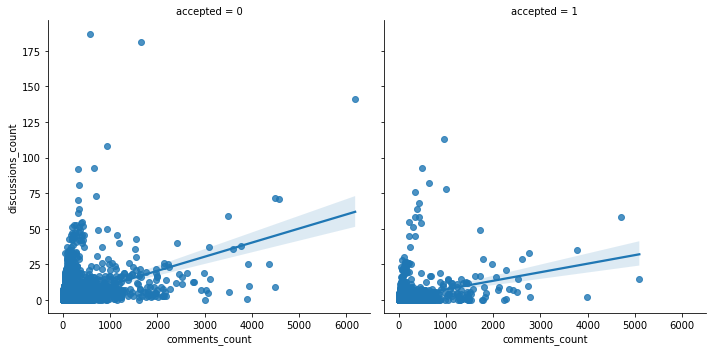

In [7]:
sns.lmplot( data=data_df,x="comments_count", y="discussions_count", col="accepted")

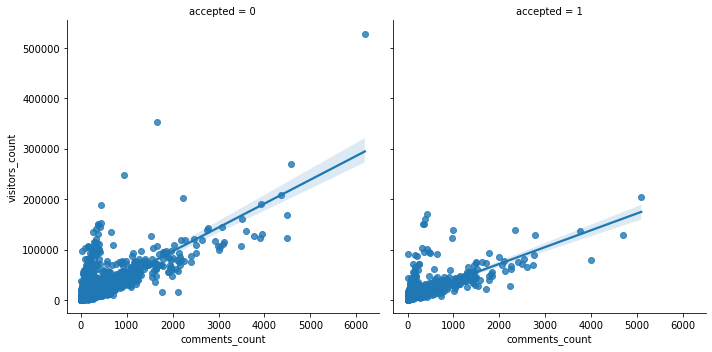

In [8]:
sns.lmplot(data=data_df,x="comments_count", y="visitors_count", col="accepted")

<AxesSubplot:xlabel='accepted', ylabel='movie_count'>

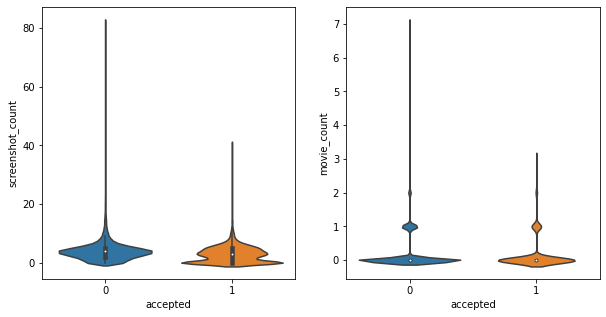

In [9]:
fig,axes = plt.subplots(1,2,facecolor='white',figsize=(10,5))

sns.violinplot(data=data_df,x='accepted',y='screenshot_count',ax=axes[0])
sns.violinplot(data=data_df,x='accepted',y='movie_count',ax=axes[1])

<AxesSubplot:>

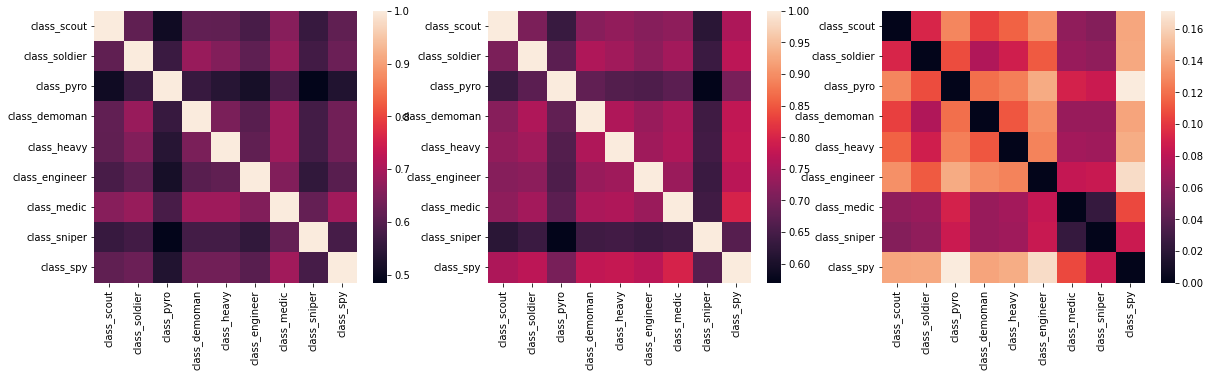

In [10]:
fig,axes = plt.subplots(1,3,figsize=(20,5))

accepted_class_corr =accepted_df[[f'class_{c}' for c in classes]].corr()
not_accepted_class_corr =not_accepted_df[[f'class_{c}' for c in classes]].corr()


sns.heatmap(not_accepted_class_corr,ax=axes[0])
sns.heatmap(accepted_class_corr,ax=axes[1])
sns.heatmap(accepted_class_corr-not_accepted_class_corr,ax=axes[2])

<AxesSubplot:>

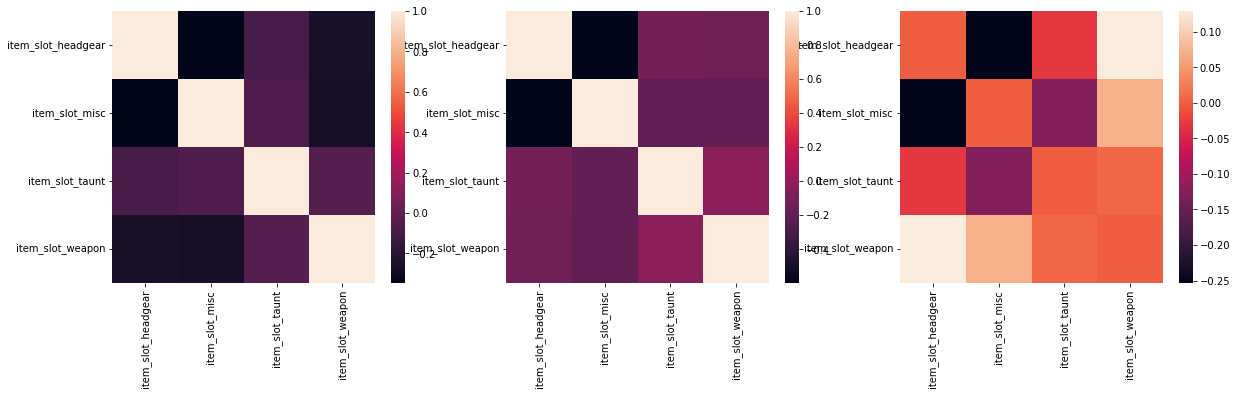

In [11]:
fig,axes = plt.subplots(1,3,figsize=(20,5))

accepted_item_slot_corr =accepted_df[[f'item_slot_{s}' for s in item_slots]].corr()
not_accepted_item_slot_corr =not_accepted_df[[f'item_slot_{s}' for s in item_slots]].corr()


sns.heatmap(not_accepted_item_slot_corr,ax=axes[0])
sns.heatmap(accepted_item_slot_corr,ax=axes[1])
sns.heatmap(accepted_item_slot_corr-not_accepted_item_slot_corr,ax=axes[2])

<AxesSubplot:title={'center':'is_medal'}, ylabel='accepted'>

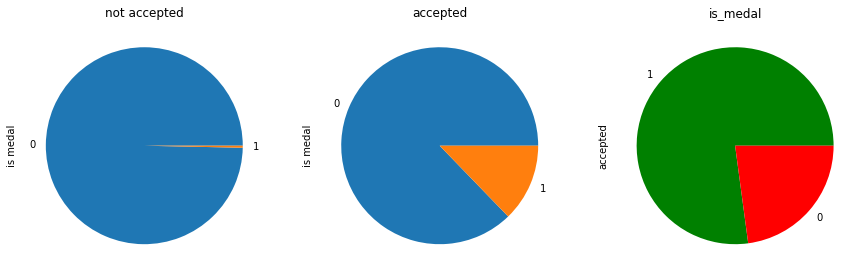

In [12]:
fig,axes = plt.subplots(1,3,facecolor='white',figsize=(15,5))

not_accepted_medals = (not_accepted_df['name'].str.contains('medal',case=False) | not_accepted_df['description'].str.contains('medal',case=False)).astype('int')
accepted_medals = (accepted_df['name'].str.contains('medal',case=False) | accepted_df['description'].str.contains('medal',case=False)).astype('int')

not_accepted_medals.value_counts().plot(kind='pie',ax=axes[0],title='not accepted',label='is medal')
accepted_medals.value_counts().plot(kind='pie',ax=axes[1],title='accepted',label='is medal')

pd.concat([accepted_df[accepted_medals == 1],not_accepted_df[not_accepted_medals == 1]])['accepted'].value_counts().plot(kind='pie',ax=axes[2],title='is_medal',colors=['green','red'])

<AxesSubplot:xlabel='accepted', ylabel='description_w'>

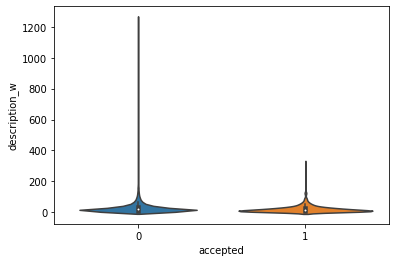

In [13]:
data_df['description_w'] = data_df['description'].map(lambda d: len(d.split()))

sns.violinplot(data=data_df,x='accepted',y='description_w')

<AxesSubplot:xlabel='submitted_by_submitter', ylabel='Count'>

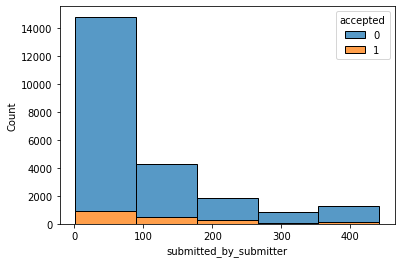

In [14]:
submitter_value_counts = data_df['submitter'].value_counts()
data_df['submitted_by_submitter'] =  data_df['submitter'].map(lambda s:submitter_value_counts[s])

sns.histplot(data=data_df,x='submitted_by_submitter',hue='accepted',multiple='stack',bins=5)


<AxesSubplot:xlabel='posted_month', ylabel='Count'>

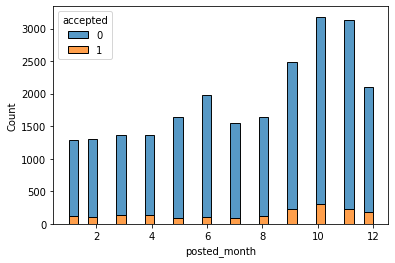

In [15]:
data_df['posted_month'] = data_df['posted_time'].map(lambda ts: datetime.datetime.fromtimestamp(ts).month)

sns.histplot(data=data_df,x='posted_month',hue='accepted',multiple='stack')

<AxesSubplot:xlabel='posted_year', ylabel='Count'>

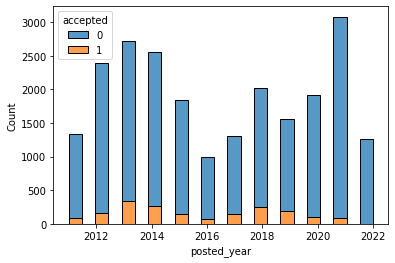

In [16]:
data_df['posted_year'] = data_df['posted_time'].map(lambda ts: datetime.datetime.fromtimestamp(ts).year)

sns.histplot(data=data_df,x='posted_year',hue='accepted',multiple='stack')

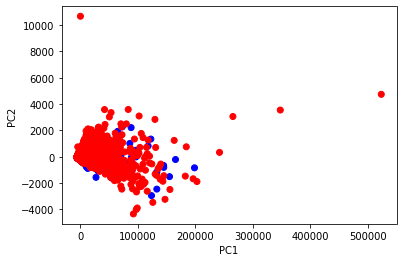

In [17]:
user_interaction_columns = ['featured_collection_count', 'favorites_count', 'comments_count', 'discussions_count', 'visitors_count']

dataset = data_df.loc[:,user_interaction_columns]

pca2 = PCA(n_components=2)
pcComponents = pca2.fit_transform(dataset)
principal_df = pd.DataFrame(data = pcComponents, columns = ['principal component 1', 'principal component 2'])

final_df = pd.concat([principal_df, data_df[['accepted']]], axis = 1)

fig = plt.figure()
ax = plt.axes()
colormap = np.array(['r', 'b'])
ax.scatter(final_df['principal component 1'], final_df['principal component 2'], c=colormap[final_df.accepted])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

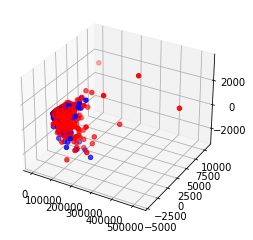

In [18]:
dataset = data_df.loc[:,user_interaction_columns]

pca2 = PCA(n_components=3)
pcComponents = pca2.fit_transform(dataset)
principal_df = pd.DataFrame(data = pcComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

final_df = pd.concat([principal_df, data_df[['accepted']]], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colormap = np.array(['r', 'b','g'])

ax.scatter(final_df['principal component 1'], final_df['principal component 2'], final_df['principal component 3'], c=colormap[final_df.accepted])
plt.show()